In [1]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/nslkddmaster/Field Names.csv
/kaggle/input/nslkddmaster/KDDTrain.txt
/kaggle/input/nslkddmaster/KDDTrain_20Percent.txt
/kaggle/input/nslkddmaster/ReadMe.txt
/kaggle/input/nslkddmaster/Attack Types.csv
/kaggle/input/nslkddmaster/KDDTest-21.txt
/kaggle/input/nslkddmaster/20 Percent Training Set.csv
/kaggle/input/nslkddmaster/KDDTrain.csv
/kaggle/input/nslkddmaster/KDDTest.csv
/kaggle/input/nslkddmaster/Field Names.docx
/kaggle/input/nslkddmaster/Small Training Set.csv
/kaggle/input/nsl-kdd/KDDTest-21.arff
/kaggle/input/nsl-kdd/KDDTest1.jpg
/kaggle/input/nsl-kdd/KDDTest.arff
/kaggle/input/nsl-kdd/KDDTrain_20Percent.arff
/kaggle/input/nsl-kdd/KDDTest.txt
/kaggle/input/nsl-kdd/KDDTrain.arff
/kaggle/input/nsl-kdd/index.html
/kaggle/input/nsl-kdd/KDDTrain1.jpg


In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [3]:
# importing dataset
df_train = pd.read_csv('/kaggle/input/nslkddmaster/KDDTrain.txt',header=None, names = col_names)
df_test = pd.read_csv('/kaggle/input/nsl-kdd/KDDTest.txt',header=None, names=col_names)

In [4]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [6]:
df_test.drop(['difficulty_level'],axis=1,inplace=True)
df_test.shape

(22544, 42)

In [7]:
df_train.drop(['difficulty_level'],axis=1,inplace=True)
df_train.shape

(125973, 42)

In [8]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df_train.drop([0],inplace=True)
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [11]:
df_test.drop([0],inplace=True)
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
5,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


In [12]:
df_train.isna().any()                      #Dropping null columns
df_train.columns[df_train.isna().any()].tolist()
df_train=df_train.dropna(axis=1)
df_train.head(5)
df_train['label'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [13]:
df_test.isna().any()                      #Dropping null columns
df_test.columns[df_train.isna().any()].tolist()
df_test=df_test.dropna(axis=1)
df_test.head(5)
df_test['label'].value_counts()

normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: label, dtype: int64

In [14]:
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [15]:
change_label(df_train)

In [16]:
change_label(df_test)

In [17]:
df_train.label.value_counts()

normal    67342
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

In [18]:
df_test.label.value_counts()

normal    9711
Dos       7459
R2L       2885
Probe     2421
U2R         67
Name: label, dtype: int64

In [19]:
numeric_col_train = df_train.select_dtypes(include='number').columns

In [20]:
numeric_col_test = df_test.select_dtypes(include='number').columns

In [21]:
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [22]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,Dos


In [23]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,Dos
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,Probe
5,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


In [24]:
df_train = normalization(df_train.copy(),numeric_col_train)
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,-0.11025,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-1.035693,-1.161035,2.736839,2.367729,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,normal
2,-0.11025,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.809862,-0.938292,-0.174419,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,Dos
3,-0.11025,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089487,-0.007736,-0.095076,...,1.258746,1.066393,-0.439079,-0.383106,0.066249,-0.572087,-0.602436,-0.387635,-0.345086,normal
4,-0.11025,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089487,-0.007736,-0.095076,...,1.258746,1.066393,-0.439079,-0.480194,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,normal
5,-0.11025,tcp,private,REJ,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.873095,-1.005115,-0.068555,-0.480194,-0.289105,-0.639535,-0.624874,2.874397,2.753901,Dos


In [25]:
df_test = normalization(df_test.copy(),numeric_col_test)
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,-0.155538,tcp,private,REJ,-0.021989,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,-1.250274,-1.397261,-0.138373,-0.431868,-0.229986,-0.358127,-0.352758,1.980007,1.929318,Dos
2,-0.154116,tcp,ftp_data,SF,0.005472,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.489856,0.002876,-0.228987,1.559859,0.004223,-0.358127,-0.352758,-0.602670,-0.565432,normal
3,-0.155538,icmp,eco_i,SF,-0.021946,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.749292,0.898046,-0.410214,2.833257,3.048941,-0.358127,-0.352758,-0.602670,-0.565432,Probe
4,-0.154827,tcp,telnet,RSTO,-0.021989,-0.096191,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.489856,-0.685716,0.360004,-0.333914,0.004223,-0.358127,-0.352758,1.540952,1.205841,Probe
5,-0.155538,tcp,http,SF,-0.021424,0.587149,-0.017624,-0.059105,-0.01946,-0.113524,...,1.022035,0.898046,-0.410214,-0.399216,0.121328,-0.321515,-0.352758,-0.602670,-0.565432,normal


In [26]:
cat_col = ['protocol_type','service','flag']

In [27]:
categorical_train = df_train[cat_col]
categorical_train.head()

,protocol_type,service,flag
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF
5,tcp,private,REJ


In [28]:
categorical_test = df_test[cat_col]
categorical_test.head()

,protocol_type,service,flag
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO
5,tcp,http,SF


In [29]:
categorical_train = pd.get_dummies(categorical_train,columns=cat_col)
categorical_train.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
categorical_test = pd.get_dummies(categorical_test,columns=cat_col)
categorical_test.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Binary Classification dataset

In [31]:
bin_label_train = pd.DataFrame(df_train.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [32]:
bin_label_test = pd.DataFrame(df_test.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [33]:
bin_data_train = df_train.copy()
bin_data_train['label'] = bin_label_train

In [34]:
bin_data_test = df_test.copy()
bin_data_test['label'] = bin_label_test

In [35]:
le1 = preprocessing.LabelEncoder()
enc_label_train = bin_label_train.apply(le1.fit_transform)
bin_data_train['intrusion'] = enc_label_train

In [36]:
le2 = preprocessing.LabelEncoder()
enc_label_test = bin_label_test.apply(le2.fit_transform)
bin_data_test['intrusion'] = enc_label_test

In [37]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [38]:
le2.classes_

array(['abnormal', 'normal'], dtype=object)

In [39]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

In [40]:
bin_data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
1,-0.11025,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-1.161035,2.736839,2.367729,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,normal,1
2,-0.11025,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.938292,-0.174419,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,abnormal,0
3,-0.11025,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089487,-0.007736,-0.095076,...,1.066393,-0.439079,-0.383106,0.066249,-0.572087,-0.602436,-0.387635,-0.345086,normal,1
4,-0.11025,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089487,-0.007736,-0.095076,...,1.066393,-0.439079,-0.480194,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,normal,1
5,-0.11025,tcp,private,REJ,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-1.005115,-0.068555,-0.480194,-0.289105,-0.639535,-0.624874,2.874397,2.753901,abnormal,0


In [41]:
bin_data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
1,-0.155538,tcp,private,REJ,-0.021989,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,-1.397261,-0.138373,-0.431868,-0.229986,-0.358127,-0.352758,1.980007,1.929318,abnormal,0
2,-0.154116,tcp,ftp_data,SF,0.005472,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,0.002876,-0.228987,1.559859,0.004223,-0.358127,-0.352758,-0.602670,-0.565432,normal,1
3,-0.155538,icmp,eco_i,SF,-0.021946,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,0.898046,-0.410214,2.833257,3.048941,-0.358127,-0.352758,-0.602670,-0.565432,abnormal,0
4,-0.154827,tcp,telnet,RSTO,-0.021989,-0.096191,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.685716,0.360004,-0.333914,0.004223,-0.358127,-0.352758,1.540952,1.205841,abnormal,0
5,-0.155538,tcp,http,SF,-0.021424,0.587149,-0.017624,-0.059105,-0.01946,-0.113524,...,0.898046,-0.410214,-0.399216,0.121328,-0.321515,-0.352758,-0.602670,-0.565432,normal,1


In [42]:
bin_data_train = pd.get_dummies(bin_data_train,columns=['label'],prefix="",prefix_sep="") 
bin_data_train['label'] = bin_label_train
bin_data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,label
1,-0.110250,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,2.367729,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,1,0,1,normal
2,-0.110250,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0,1,0,abnormal
3,-0.110250,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.383106,0.066249,-0.572087,-0.602436,-0.387635,-0.345086,1,0,1,normal
4,-0.110250,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.480194,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,1,0,1,normal
5,-0.110250,tcp,private,REJ,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.480194,-0.289105,-0.639535,-0.624874,2.874397,2.753901,0,1,0,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110250,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0,1,0,abnormal
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.447832,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,1,0,1,normal
125970,-0.110250,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.480194,-0.289105,0.979230,-0.624874,-0.355015,-0.376389,1,0,1,normal
125971,-0.110250,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0,1,0,abnormal


In [43]:
bin_data_test = pd.get_dummies(bin_data_test,columns=['label'],prefix="",prefix_sep="") 
bin_data_test['label'] = bin_label_test
bin_data_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,label
1,-0.155538,tcp,private,REJ,-0.021989,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.431868,-0.229986,-0.358127,-0.352758,1.980007,1.929318,0,1,0,abnormal
2,-0.154116,tcp,ftp_data,SF,0.005472,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,1.559859,0.004223,-0.358127,-0.352758,-0.602670,-0.565432,1,0,1,normal
3,-0.155538,icmp,eco_i,SF,-0.021946,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,2.833257,3.048941,-0.358127,-0.352758,-0.602670,-0.565432,0,1,0,abnormal
4,-0.154827,tcp,telnet,RSTO,-0.021989,-0.096191,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.333914,0.004223,-0.358127,-0.352758,1.540952,1.205841,0,1,0,abnormal
5,-0.155538,tcp,http,SF,-0.021424,0.587149,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.399216,0.121328,-0.321515,-0.352758,-0.602670,-0.565432,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155538,tcp,smtp,SF,-0.020309,-0.081205,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.399216,-0.112881,-0.321515,-0.352758,-0.602670,-0.565432,1,0,1,normal
22540,-0.155538,tcp,http,SF,-0.021318,-0.052693,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.399216,-0.112881,-0.321515,-0.352758,-0.602670,-0.565432,1,0,1,normal
22541,-0.155538,tcp,http,SF,0.093370,0.294915,-0.017624,-0.059105,-0.01946,2.040656,...,-0.431868,-0.229986,-0.358127,-0.352758,-0.421883,-0.390799,0,1,0,abnormal
22542,-0.155538,udp,domain_u,SF,-0.021900,-0.094919,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.431868,-0.229986,-0.358127,-0.352758,-0.602670,-0.565432,1,0,1,normal


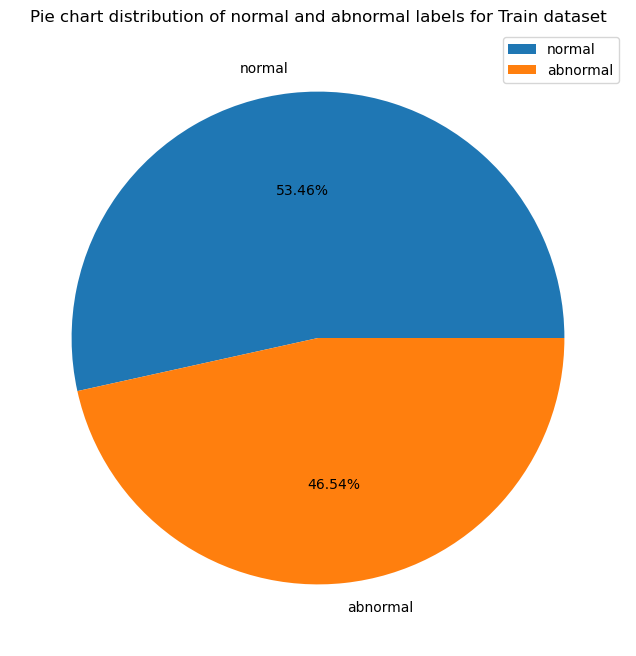

In [44]:
plt.figure(figsize=(8,8))
plt.pie(bin_data_train.label.value_counts(),labels=bin_data_train.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels for Train dataset")
plt.legend()
plt.savefig('Distribution_chart_train.png')
plt.show()

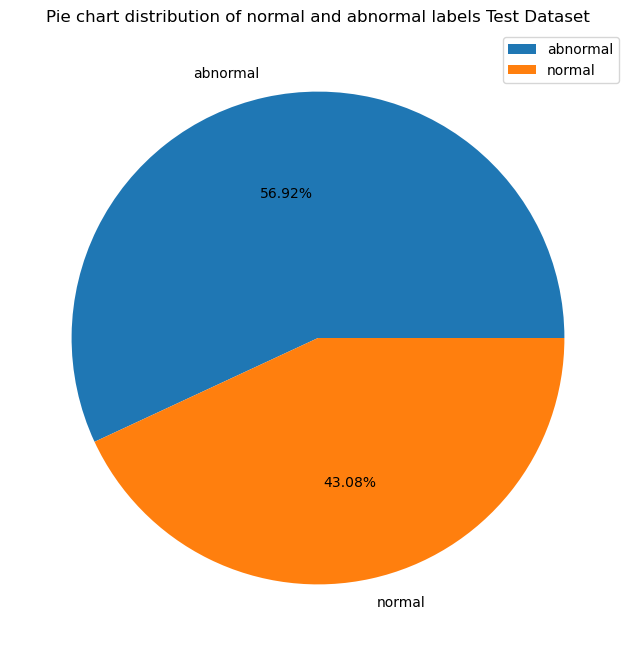

In [45]:
plt.figure(figsize=(8,8))
plt.pie(bin_data_test.label.value_counts(),labels=bin_data_test.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels Test Dataset")
plt.legend()
plt.savefig('Distribution_chart_test.png')
plt.show()

In [46]:
bin_data_test.to_csv('bin_data_test.csv')

In [47]:
bin_data_train.to_csv('bin_data_train.csv');

# Multi-Classification Dataset

In [48]:
multi_data_train = df_train.copy()
multi_label_train = pd.DataFrame(multi_data_train.label)

In [49]:
multi_data_test = df_test.copy()
multi_label_test = pd.DataFrame(multi_data_test.label)

In [50]:
le3 = preprocessing.LabelEncoder()
enc_label_train = multi_label_train.apply(le3.fit_transform)
multi_data_train['intrusion'] = enc_label_train
le4 = preprocessing.LabelEncoder()
enc_label_test = multi_label_test.apply(le4.fit_transform)
multi_data_test['intrusion'] = enc_label_test

In [51]:
le3.classes_

array(['Dos', 'Probe', 'R2L', 'U2R', 'normal'], dtype=object)

In [52]:
le4.classes_

array(['Dos', 'Probe', 'R2L', 'U2R', 'normal'], dtype=object)

In [53]:
np.save("le3_classes.npy",le3.classes_,allow_pickle=True)
np.save("le4_classes.npy",le4.classes_,allow_pickle=True)

In [54]:
multi_data_train = pd.get_dummies(multi_data_train,columns=['label'],prefix="",prefix_sep="") 
multi_data_train['label'] = multi_label_train
multi_data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,Dos,Probe,R2L,U2R,normal,label
1,-0.110250,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.624874,-0.387635,-0.376389,4,0,0,0,0,1,normal
2,-0.110250,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,1.618946,-0.387635,-0.376389,0,1,0,0,0,0,Dos
3,-0.110250,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.602436,-0.387635,-0.345086,4,0,0,0,0,1,normal
4,-0.110250,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.624874,-0.387635,-0.376389,4,0,0,0,0,1,normal
5,-0.110250,tcp,private,REJ,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.624874,2.874397,2.753901,0,1,0,0,0,0,Dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110250,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,1.618946,-0.387635,-0.376389,0,1,0,0,0,0,Dos
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.624874,-0.387635,-0.376389,4,0,0,0,0,1,normal
125970,-0.110250,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.624874,-0.355015,-0.376389,4,0,0,0,0,1,normal
125971,-0.110250,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,1.618946,-0.387635,-0.376389,0,1,0,0,0,0,Dos


In [55]:
multi_data_test = pd.get_dummies(multi_data_test,columns=['label'],prefix="",prefix_sep="") 
multi_data_test['label'] = multi_label_test
multi_data_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,Dos,Probe,R2L,U2R,normal,label
1,-0.155538,tcp,private,REJ,-0.021989,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.352758,1.980007,1.929318,0,1,0,0,0,0,Dos
2,-0.154116,tcp,ftp_data,SF,0.005472,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.352758,-0.602670,-0.565432,4,0,0,0,0,1,normal
3,-0.155538,icmp,eco_i,SF,-0.021946,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.352758,-0.602670,-0.565432,1,0,1,0,0,0,Probe
4,-0.154827,tcp,telnet,RSTO,-0.021989,-0.096191,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.352758,1.540952,1.205841,1,0,1,0,0,0,Probe
5,-0.155538,tcp,http,SF,-0.021424,0.587149,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.352758,-0.602670,-0.565432,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155538,tcp,smtp,SF,-0.020309,-0.081205,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.352758,-0.602670,-0.565432,4,0,0,0,0,1,normal
22540,-0.155538,tcp,http,SF,-0.021318,-0.052693,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.352758,-0.602670,-0.565432,4,0,0,0,0,1,normal
22541,-0.155538,tcp,http,SF,0.093370,0.294915,-0.017624,-0.059105,-0.01946,2.040656,...,-0.352758,-0.421883,-0.390799,0,1,0,0,0,0,Dos
22542,-0.155538,udp,domain_u,SF,-0.021900,-0.094919,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.352758,-0.602670,-0.565432,4,0,0,0,0,1,normal


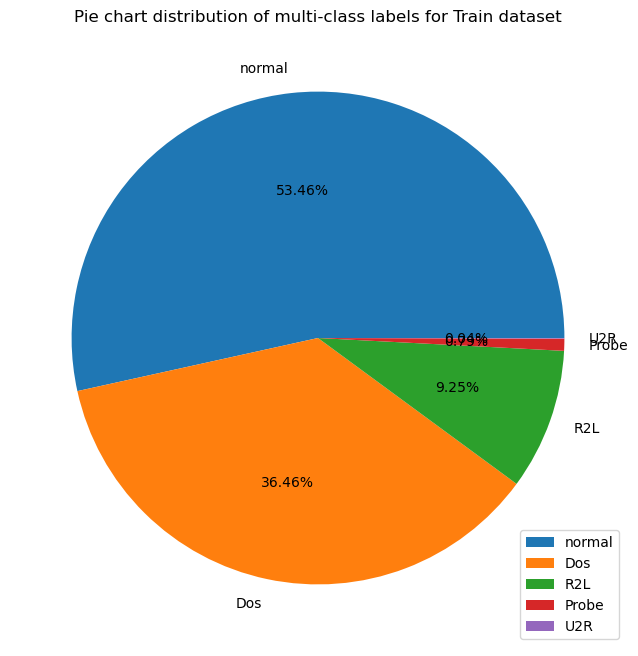

In [56]:
plt.figure(figsize=(8,8))
plt.pie(multi_data_train.label.value_counts(),labels=multi_data_train.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels for Train dataset')
plt.legend()
plt.savefig('pie_multi_class_train.png')
plt.show()

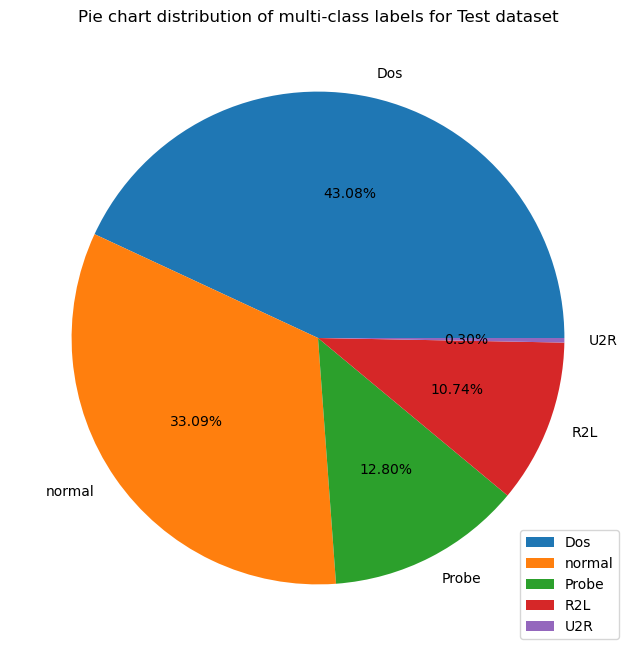

In [57]:
plt.figure(figsize=(8,8))
plt.pie(multi_data_test.label.value_counts(),labels=multi_data_test.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels for Test dataset')
plt.legend()
plt.savefig('pie_multi_class_test.png')
plt.show()

# Feature Extraction

In [58]:
numeric_multi_train = multi_data_train[numeric_col_train]
numeric_multi_train['intrusion'] = multi_data_train['intrusion']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
numeric_multi_test = multi_data_test[numeric_col_test]
numeric_multi_test['intrusion'] = multi_data_test['intrusion']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
corr_train = numeric_multi_train.corr()
corr_train_y = abs(corr_train['intrusion'])
highest_corr_train = corr_train_y[corr_train_y >0.5]
highest_corr_train.sort_values(ascending=True)

count                       0.613249
logged_in                   0.693780
srv_serror_rate             0.710850
serror_rate                 0.712860
dst_host_serror_rate        0.714245
dst_host_same_srv_rate      0.716830
dst_host_srv_serror_rate    0.717386
dst_host_srv_count          0.718590
same_srv_rate               0.798357
intrusion                   1.000000
Name: intrusion, dtype: float64

In [61]:
corr_test = numeric_multi_test.corr()
corr_test_y = abs(corr_test['intrusion'])
highest_corr_test = corr_test_y[corr_test_y >0.5]
highest_corr_test.sort_values(ascending=True)

dst_host_srv_rerror_rate    0.540773
srv_rerror_rate             0.547749
rerror_rate                 0.553562
dst_host_rerror_rate        0.570772
logged_in                   0.572698
dst_host_srv_count          0.575035
dst_host_same_srv_rate      0.605445
same_srv_rate               0.614731
intrusion                   1.000000
Name: intrusion, dtype: float64

<AxesSubplot:>

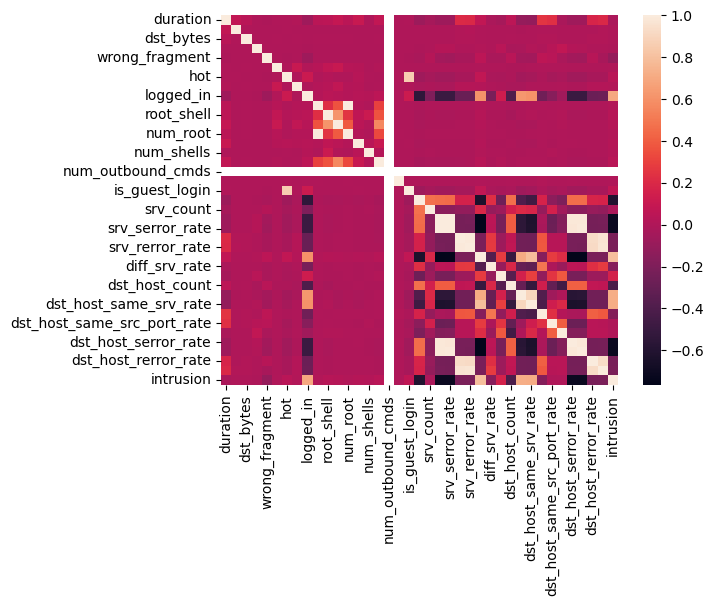

In [62]:
sns.heatmap(corr_train)

In [63]:
plt.savefig('corr_heatplot_train.png')

<Figure size 640x480 with 0 Axes>

<AxesSubplot:>

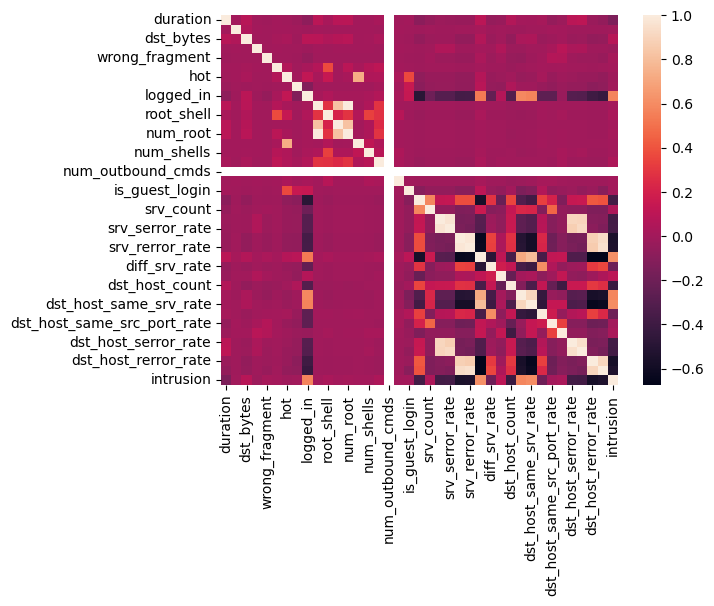

In [64]:
sns.heatmap(corr_test)

In [65]:
plt.savefig('corr_heatplot_test.png')

<Figure size 640x480 with 0 Axes>

In [66]:
numeric_multi_train = multi_data_train[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]

In [67]:
numeric_multi_test = multi_data_test[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]

In [68]:
numeric_multi_train = numeric_multi_train.join(categorical_train)
multi_data_train = numeric_multi_train.join(multi_data_train[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [69]:
numeric_multi_test = numeric_multi_test.join(categorical_test)
multi_data_test = numeric_multi_test.join(multi_data_test[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [70]:
multi_data_train

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
1,-0.620987,-0.809267,-0.631933,-0.637213,-0.639535,-1.161035,-0.624874,-1.035693,-1.321420,0,...,0,1,0,4,0,0,0,0,1,normal
2,0.339641,-0.809267,1.605095,1.602655,1.608750,-0.938292,1.618946,-0.809862,-1.389660,0,...,0,0,0,0,1,0,0,0,0,Dos
3,-0.690851,1.235686,-0.184527,-0.189239,-0.572087,1.066393,-0.602436,1.258746,0.771288,0,...,0,1,0,4,0,0,0,0,1,normal
4,-0.472526,1.235686,-0.631933,-0.637213,-0.639535,1.066393,-0.624874,1.258746,0.771288,0,...,0,1,0,4,0,0,0,0,1,normal
5,0.322176,-0.809267,-0.631933,-0.637213,-0.639535,-1.005115,-0.624874,-0.873095,-1.139445,0,...,0,0,0,0,1,0,0,0,0,Dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872354,-0.809267,1.605095,1.602655,1.608750,-0.938292,1.618946,-0.818895,-1.184939,0,...,0,0,0,0,1,0,0,0,0,Dos
125969,-0.717050,-0.809267,-0.631933,-0.637213,-0.639535,0.977296,-0.624874,1.159381,0.771288,0,...,0,1,0,4,0,0,0,0,1,normal
125970,-0.725783,1.235686,-0.631933,-0.637213,0.979230,-0.893743,-0.624874,-0.773729,0.771288,0,...,0,1,0,4,0,0,0,0,1,normal
125971,0.523034,-0.809267,1.605095,1.602655,1.608750,-1.094212,1.618946,-0.972460,-1.366913,0,...,0,0,0,0,1,0,0,0,0,Dos


In [71]:
multi_data_test

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
1,0.443289,-0.890408,-0.347399,-0.348477,-0.358127,-1.397261,-0.352758,-1.250274,-1.770738,0,...,0,0,0,0,1,0,0,0,0,Dos
2,-0.607006,-0.890408,-0.347399,-0.348477,-0.358127,0.002876,-0.352758,-0.489856,0.629439,0,...,0,1,0,4,0,0,0,0,1,normal
3,-0.607006,-0.890408,-0.347399,-0.348477,-0.358127,0.898046,-0.352758,-0.749292,0.629439,1,...,0,1,0,1,0,1,0,0,0,Probe
4,-0.607006,-0.890408,0.054839,-0.348477,-0.358127,-0.685716,-0.352758,-0.489856,0.629439,0,...,0,0,0,1,0,1,0,0,0,Probe
5,-0.583666,1.123081,-0.347399,-0.348477,-0.321515,0.898046,-0.352758,1.022035,0.629439,0,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.607006,1.123081,-0.347399,-0.348477,-0.321515,0.255360,-0.352758,0.002180,0.629439,0,...,0,1,0,4,0,0,0,0,1,normal
22540,-0.599226,1.123081,-0.347399,-0.348477,-0.321515,0.898046,-0.352758,1.022035,0.629439,0,...,0,1,0,4,0,0,0,0,1,normal
22541,-0.575886,1.123081,-0.347399,-0.348477,-0.358127,0.898046,-0.352758,1.022035,0.629439,0,...,0,1,0,0,1,0,0,0,0,Dos
22542,-0.583666,-0.890408,-0.347399,-0.348477,-0.358127,0.875093,-0.352758,0.995197,0.629439,0,...,0,1,0,4,0,0,0,0,1,normal


In [72]:
multi_data_train.to_csv('multi_data_train.csv')


In [73]:
multi_data_test.to_csv('multi_data_test.csv')